<a href="https://colab.research.google.com/github/sergiomath/dataScience/blob/main/diabetes_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction using Python + Pandas
Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin.


# Table Content

1. Introduction
2. Installing Libraries
3. Importing Data
4. Missing Value Analysis
5. Exploratory Data Analysis
6. Feature Engineering
7. Modeling
8. Hyperparameter Tuning
9. Prediction

# Introduction
According to WHO, Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood sugar. Hyperglycaemia, or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.

Between 2000 and 2016, there was a 5% increase in premature mortality rates (i.e. before the age of 70) from diabetes. In high-income countries the premature mortality rate due to diabetes decreased from 2000 to 2010 but then increased in 2010-2016. In lower-middle-income countries, the premature mortality rate due to diabetes increased across both periods.

In this notebook, i will do some feature analysis and try to find out the rootcauses

# <font size="5">Objectives</font>
1. To experiment with different classification methods to see which yields the highest accuracy
2. Classify whether someone has diabetes or not from given features
3. To determine which features are the most indicative of diabetes

# <font size="5">Dataset</font>
I have used [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Kaggle Dataset

The dataset contains below features and labels:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome


# Installing Libraries

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # to plot charts
from collections import Counter
import os

# Modeling
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split


I have imported most common libraries used in python for machine learning such as Pandas, Seaborn, Matplitlib etc

# Importing Data

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/sergiomath/dataScience/main/Proyectos/Diabetes/diabetes.csv")

In [15]:
# Get familier with dataset structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Excepting BMI and DiabetesPedigreeFunction all the columns are integer. Outcome is the label containing 1 and 0 values. 1 means person has diabetes and 0 mean person is not diabetic

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are 768 records in the dataset, in which mean age of people is 33

# Missing Value Analysis

Next, i will cleanup the dataset which is the important part of data science. Missing data can lead to wrong statistics during modeling and predictions.

In [17]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# Explore missing values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

I observed that there is no missing values in dataset however the features like Glucose, BloodPressure, Insulin, SkinThickness has 0 values which is not possible. We have to replace 0 values with either mean or median values of specific column

In [19]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df.Glucose.value_counts()

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64

In [20]:
# Correcting missing values in blood pressure

df[df['BloodPressure'] == 0]['BloodPressure'].value_counts()
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

There are 35 records with 0 BloodPressure in dataset

In [21]:
# Correcting missing values in BMI

df[df['BMI'] == 0]['BMI'].value_counts()
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [22]:
# Correct missing values in Insulin and SkinThickness

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

In [23]:
# Review dataset statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now i have dataset without missing values in features which is good

# Exploratory Data Analysis

In [24]:
# Show top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


**Correlation**

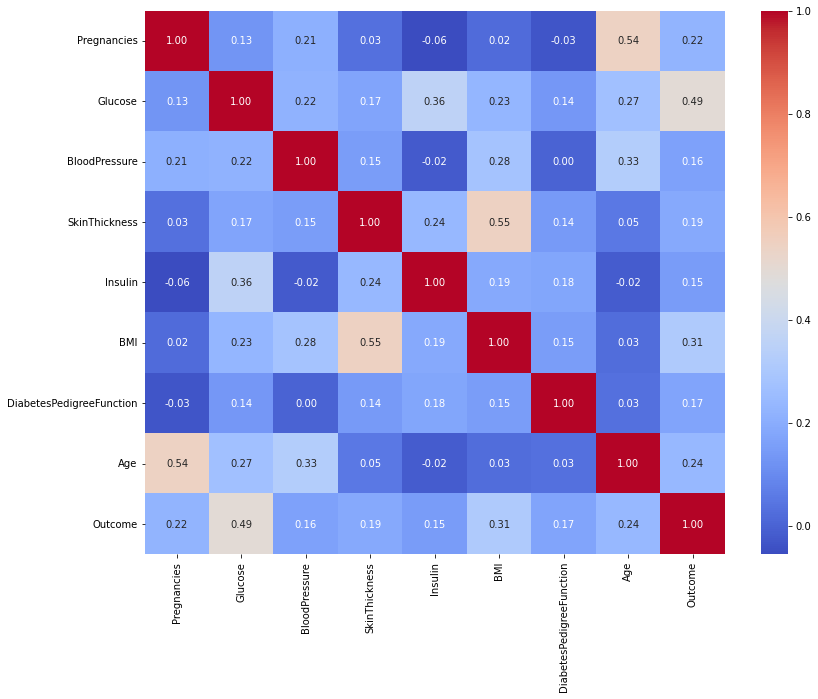

In [25]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

According to observation, features like Pregnancies, Gluecose, BMI, and Age is more correlated with Outcome

**Pregnancies**

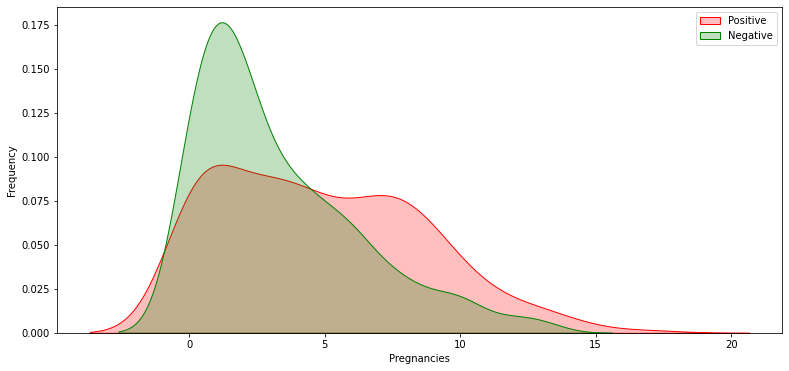

In [26]:
# Explore Pregnancies vs Outcome
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])


**Outcome**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


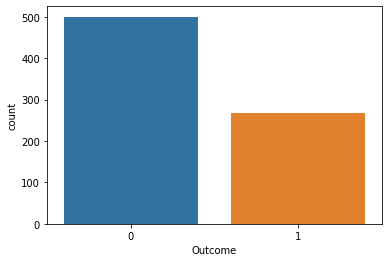

In [27]:
sns.countplot('Outcome',data=df)


There are more people who do not have diabetes in dataset which is around 65% and 35% people has diabetes

In [28]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


**Glucose**

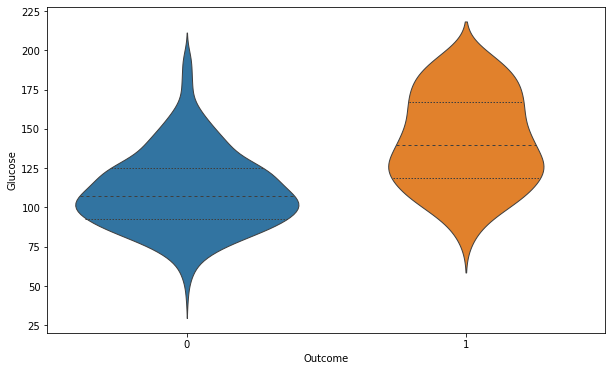

In [29]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

The chances of diabetes is gradually increasing with level of Glucose

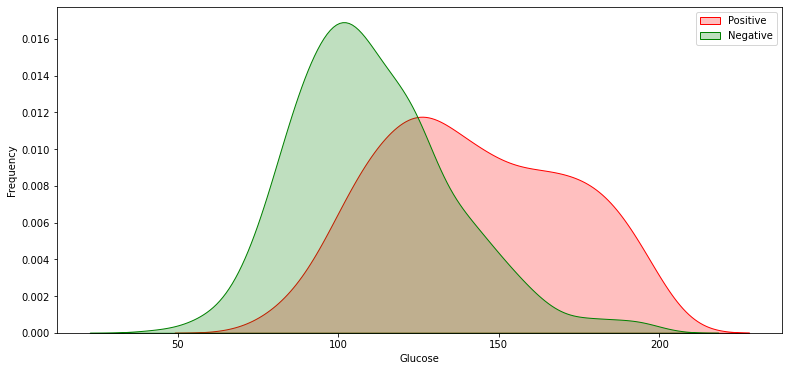

In [30]:
# Explore Glucose vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])


**Explore Glucose vs BMI vs Age**

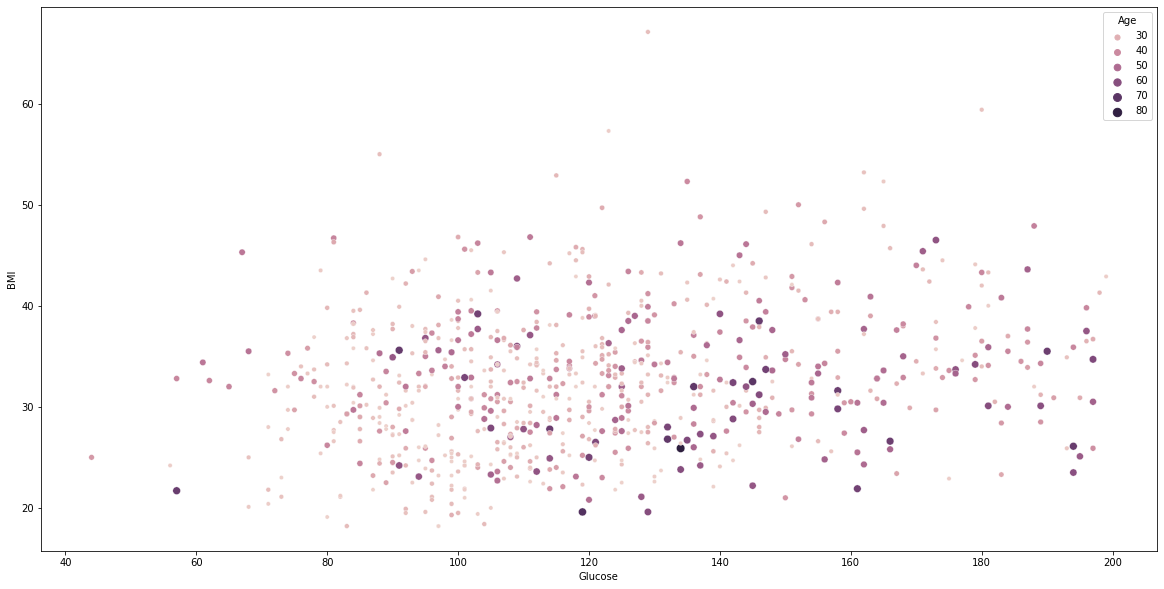

In [31]:
# Glucose vs BMI vs Age

plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

As per observation there are some outliers in features. We need to remove outliers in feature engineering

**BloodPressure**

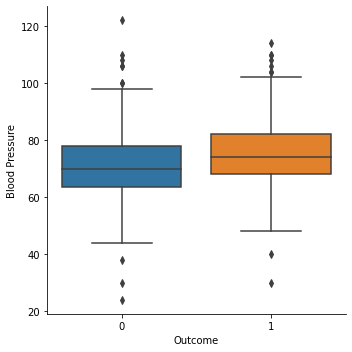

In [32]:
# Explore Age vs Sex, Parch , Pclass and SibSP
g = sns.catplot(y="BloodPressure",x="Outcome",data=df,kind="box")
g.set_ylabels("Blood Pressure")
g.set_xlabels("Outcome")

**Age vs Outcome**

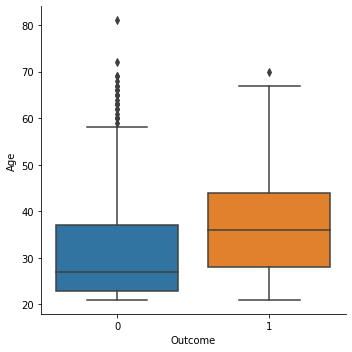

In [33]:
# Explore Age

g = sns.catplot(y="Age",x="Outcome",data=df,kind="box")
g.set_ylabels("Age")
g.set_xlabels("Outcome")

**DiabetesPedigreeFunction**

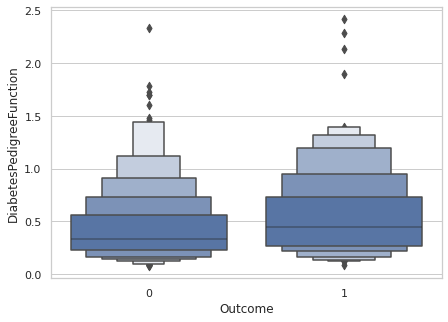

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,5))

sns.boxenplot(x="Outcome", y="DiabetesPedigreeFunction",
              color="b", 
              scale="linear", data=df)
g.set_ylabels("Diabetes Pedigree Function")
g.set_xlabels("Outcome")

# Feature Enginnering

Till now, i explored the dataset, did missing value corrections and data visualization. Next, i have started feature engineering. Feature engineering is useful to improve the performance of machine learning algorithms and is often considered as applied machine learning. Selecting the important features and reducing the size of the feature set makes computation in machine learning and data analytic algorithms more feasible.

# <font size="5">Outlier Detection</font>

In [35]:
def detect_outliers(df,n,features):
    outlier_indices = []
    """
    Detect outliers from given list of features. It returns a list of the indices
    according to the observations containing more than n outliers according
    to the Tukey method
    """
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

In [36]:
df.loc[outliers_to_drop] # Show the outliers rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110.0,46,130.0,67.1,0.319,26,1
445,0,180.0,78.0,63,14.0,59.4,2.420,25,1
370,3,173.0,82.0,48,465.0,38.4,2.137,25,1


In [37]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)

I have successfully removed all outliers from dataset now. The next step is to split the dataset in train and test and procceed the modeling

# Modeling

# <font size="5">Transforming Data</font>


Before i split the dataset i need to transform the data into quantile using `sklearn.preprocessing`

In [38]:
q  = QuantileTransformer()
X = q.fit_transform(df)
transformedDF = q.transform(X)
transformedDF = pd.DataFrame(X)
transformedDF.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (765). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  "X does not have valid feature names, but"


In [39]:
transformedDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.746728,0.812173,0.518979,0.804974,0.255890,0.593586,0.752618,0.889398,1.0
1,0.230366,0.091623,0.290576,0.645942,0.255890,0.214005,0.476440,0.556937,0.0
2,0.863220,0.956806,0.234293,0.358639,0.255890,0.077880,0.784031,0.582461,1.0
3,0.230366,0.125654,0.290576,0.358639,0.662958,0.285340,0.106675,0.000000,0.0
4,0.000000,0.723168,0.005236,0.804974,0.834424,0.929319,0.998691,0.604712,1.0


# <font size="5">Data Splitting</font>


In [40]:
## Separate train dataset and test dataset
features = df.drop(["Outcome"], axis=1)
labels = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)

# <font size="5">Cross Validate Models</font>


In [41]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

,CrossValMeans,CrossValerrors,Models
0,0.747869,0.069754,LogisticRegression
1,0.710622,0.083627,DecisionTreeClassifier
2,0.703110,0.071917,AdaBoostClassifier
3,0.760901,0.050156,SVC
4,0.762893,0.061561,RandomForestClassifier
5,0.751747,0.098608,GradientBoostingClassifier
6,0.720021,0.090282,KNeighborsClassifier


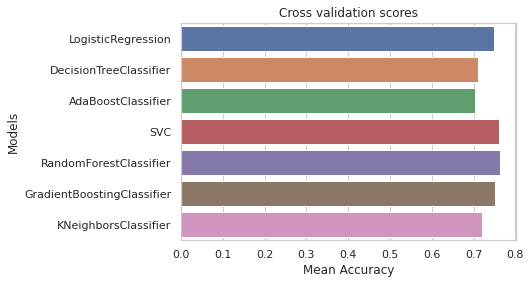

In [42]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

As per above observation, i found that SVC, RandomForestClassifier, and LogisticRegression model has more accuracy. Next, i will do hyper parameter tuning on three models

# Hyperparameter Tuning

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

I have done tuning process for SVC, RandomForestClassifier, and LogisticRegression models one by one

In [43]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [44]:
def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''

    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, grid_result.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

First of all i have imported GridSearchCV and classification_report from sklearn library. Then, i have defined `analyze_grid_result` method which will show prediction result. I called this method for each Model used in SearchCV

# <font size="5">LogisticRegression</font>

In [45]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)

# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.7883636363636363
0.788 (+/-0.260) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.788 (+/-0.260) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.788 (+/-0.260) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.788 (+/-0.250) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.785 (+/-0.253) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.745 (+/-0.266) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.238) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.705 (+/-0.281) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.232) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.696 (+/-0.264) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       147
           1   

As per my obversation, in LogisticRegression it returned best score 0.78 with `{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}` parameters. Next i will perform tuning for other models.

# <font size="5">SVC</font>

In [ ]:
# Define models and parameters for LogisticRegression
model = SVC()

# Define grid search
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
scv_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(scv_result)

SVC Model gave max 0.77 accuracy which is bit less than LogisticRegression. I will not use this model anymore.

# <font size="5">RandomForestClassifier</font>

In [ ]:
# Define models and parameters for LogisticRegression
model = RandomForestClassifier(random_state=42)


# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(grid_result)

Randomforest model gave max 0.76% accuracy which is not best comparing to other model. So i decided to use LogisticRegression Model for prediction

# Prediction

Till now, i worked on EDA, Feature Engineering, Cross Validation of Models, and Hyperparameter Tuning and find the best working Model for my dataset. Next, I did prediction from my test dataset and storing the result in CSV

In [ ]:
y_pred = logi_result.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
x_test['pred'] = y_pred
x_test

Please upvote and share my notebook if you find it useful - It keeps me motivated :)